# Project Title - World Happiness Analysis 2023

This project is aimed at providing insight into how different factors affect and contribute to the happiness of people in different countries in the year 2020. The dataset we will be working on was gotten from Kaggle and it contains nine CSV files from year 2015 up to 2023 but for this project, we will be analyzing only the year 2020. 

We will be using pandas to read in the dataset and perform some numeric statistics, Seaborn and matplotlib to visualize the relation between some columns in the dataset. 

These techniques were learned from the Zero to pandas course on Jovian. Its a great course for anyone starting out in the data field and worth checking out.

## Downloading the Dataset

To download the dataset, copy this link "opendatasets" on your browser and you will be redirected to a GitHub site. Follow the steps and download your preferred dataset which in this case is "World Happiness Report up to 2023" on kaggle.

NOTE: opendatasets is a python library 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/sazidthe1/global-happiness-scores-and-factors' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hopeikuesan
Your Kaggle Key: ········


100%|██████████| 46.0k/46.0k [00:00<00:00, 201kB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = "./global-happiness-scores-and-factors"

In [5]:
import os
os.listdir(data_dir)

['WHR_2015.csv',
 'WHR_2016.csv',
 'WHR_2017.csv',
 'WHR_2018.csv',
 'WHR_2019.csv',
 'WHR_2020.csv',
 'WHR_2021.csv',
 'WHR_2022.csv',
 'WHR_2023.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-world-happiness" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

<IPython.core.display.Javascript object>

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## Data Preparation and Cleaning

Next, we will specifying the path to the specific CSV file we will be making use of in our analysis and reading it into a data frame before beginning our analysis.

In [10]:
import pandas as pd

In [11]:
file_path1 = os.path.join(data_dir, "WHR_2020.csv")

In [12]:
df = pd.read_csv(file_path1)

In [13]:
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,Rwanda,Sub-Saharan Africa,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,South Sudan,Sub-Saharan Africa,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


After loading the WHR 2020 CSV file into a data frame, we explore the number of rows and columns in the data frame. The pandas library has already indicated this when data frame is called but another way to get this is to use the ".shape" method on the data frame and it would display the number of rows and columns the data frame contains. 

In [14]:
df.shape

(153, 9)

Next we want to see if the dataset contains any missing, invalid or incorrect data by displaying the entire data frame and looking through or using the ".isna().sum()" method to count the number of missing values

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
5,Netherlands,Western Europe,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
6,Sweden,Western Europe,7.3535,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066
7,New Zealand,North America and ANZ,7.2996,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268
8,Austria,Western Europe,7.2942,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256
9,Luxembourg,Western Europe,7.2375,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041


In [17]:
df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

As we can see, the data frame does not contain any missing values. Since the data frame has nine columns, we will not be adding any new column 

In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hopeikuesan/zerotopandas-course-project-world-happiness" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/hopeikuesan/zerotopandas-course-project-world-happiness


'https://jovian.com/hopeikuesan/zerotopandas-course-project-world-happiness'

## Exploratory Analysis and Visualization

 Now we import python modules matplotlib and sseaborn in order to visualize the dataset to get a clear picture of what is really going on in the dataset we are working on.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

After importing the python modules matplotlib and seaborn and also customizing how we want it to look, we will be creating a scatter plot using the happiness score column and the healthy life expectancy column to see if there is a correlation between these two. In other words to see how the happiness score for each country affects how long people are expected to live.   

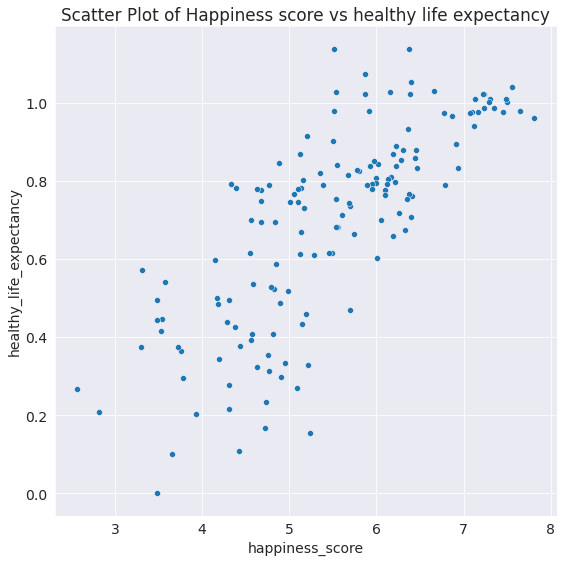

In [22]:
sns.scatterplot(x = "happiness_score", y = "healthy_life_expectancy", data = df);
plt.gca().set_title("Scatter Plot of Happiness score vs healthy life expectancy")
plt.show()

As we can see in the above scatter plot, there is a strong positive correlation between the happiness score and the healthy life expectancy of each country which means that the happiness score directly influences the healthy life expectancy (i.e how long people or a person is expected to live) of the people in a country.

We could also call ".corr()" on the data frame to get numeric values for the correlation between columns. 

In [22]:
df.corr()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043,0.418305
gdp_per_capita,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399,0.334729
social_support,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780,0.210530
healthy_life_expectancy,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852,0.353841
freedom_to_make_life_choices,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721,0.420145
generosity,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000,0.278480
perceptions_of_corruption,0.418305,0.334729,0.210530,0.353841,0.420145,0.278480,1.000000


Next, we would visualize the happiness score column and the country column using a horizontal bar plot to see a visual representation of these two columns. We will also specify the size of the bar plot to a larger size than the previous plots in order to see both columns clearly as there are a large number of rows. 

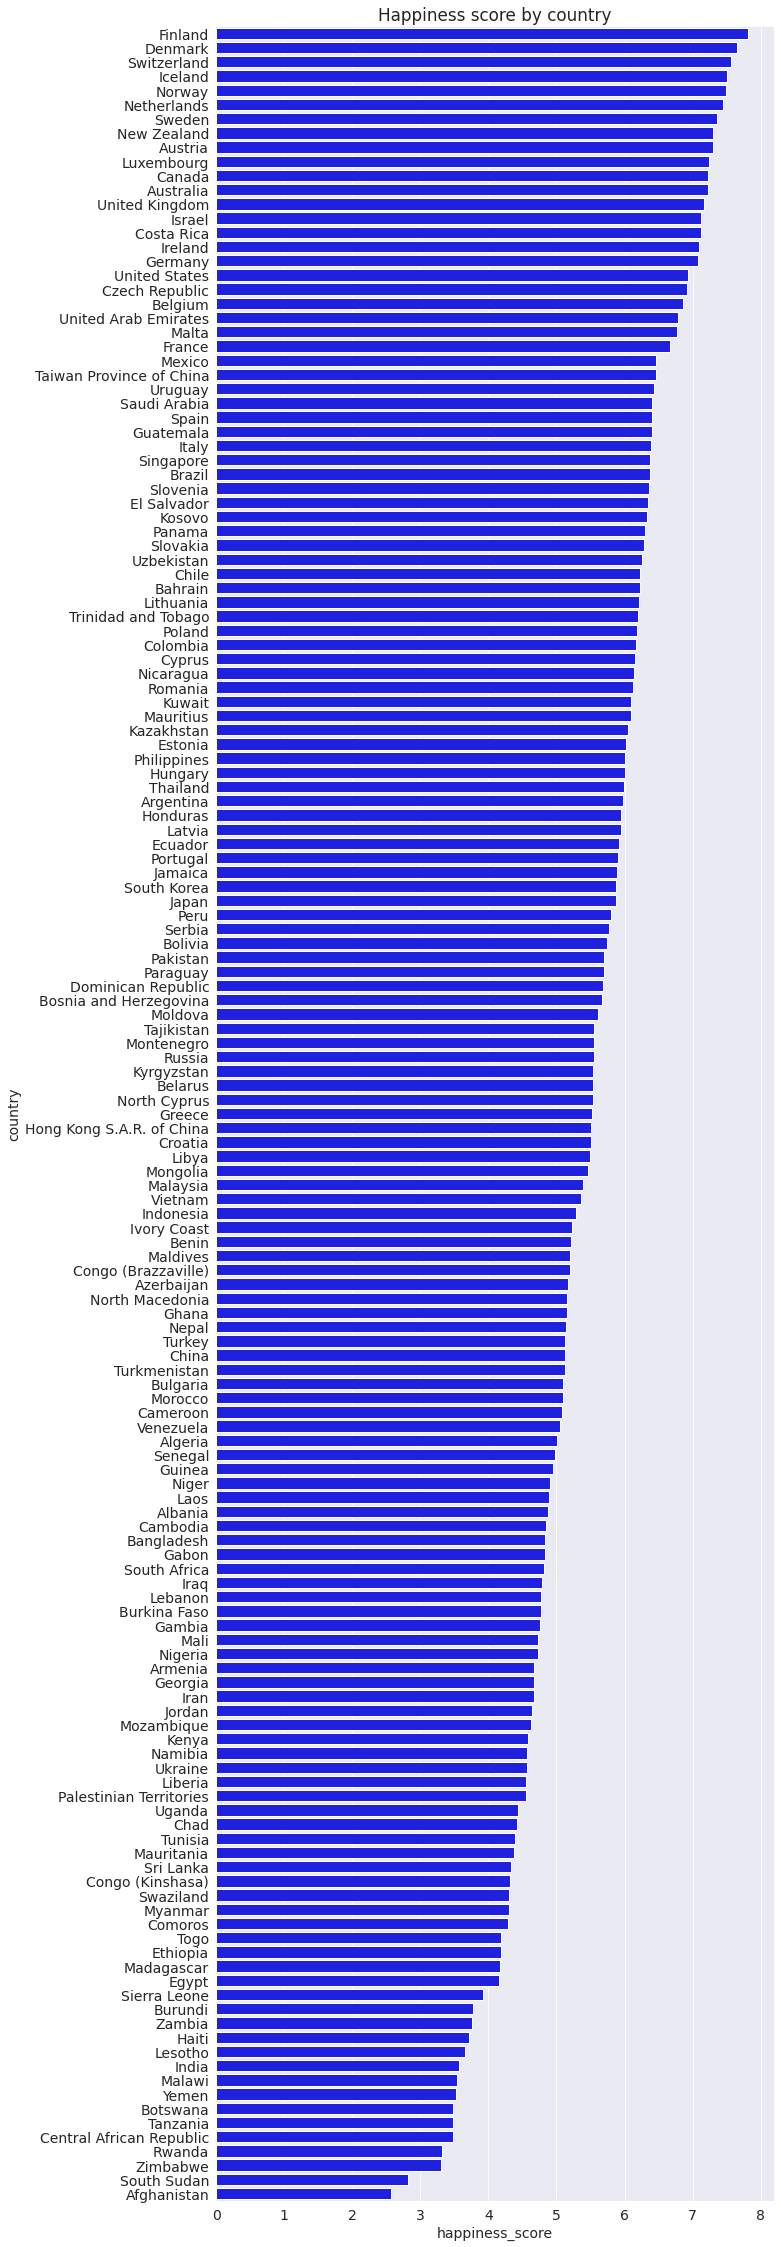

In [24]:
matplotlib.rcParams['figure.figsize'] = (10, 40)
matplotlib.rcParams['figure.facecolor'] = "#00000000"
custom_color = ["blue"]

sns.barplot(x= "happiness_score", y= "country", data= df, palette=custom_color);
plt.gca().set_title("Happiness score by country");

Next, we would be visualizing the happiness score column using a histogram to group the values into bins and see how many values fall in each bin. We have also specified the size of our plot.

Text(0.5, 1.0, 'Distribution of happiness score values')

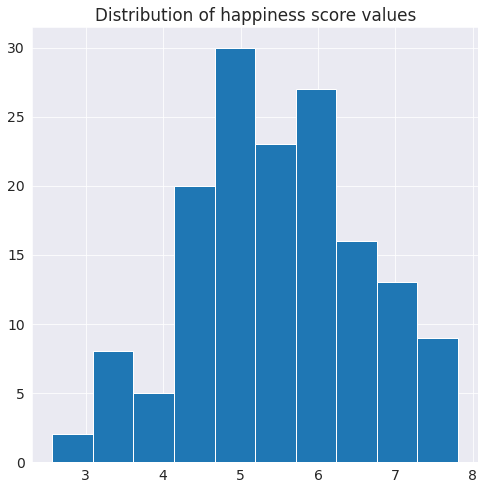

In [25]:
matplotlib.rcParams['figure.figsize'] = (8, 8)

plt.hist(df["happiness_score"])
plt.gca().set_title("Distribution of happiness score values")

In the histogram above, we can see the number of values(y axis) in the happiness score column that fall between a certain range (x axis) very clearly.  

Next, We visualize using a scatter plot on the happiness score column and the social support column in order to make some inference. 

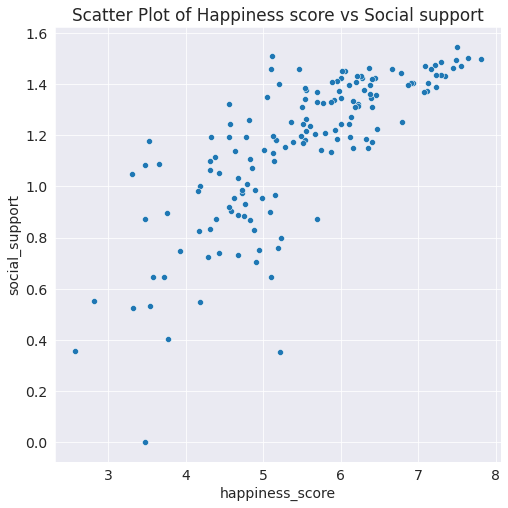

In [26]:
sns.scatterplot(x = "happiness_score", y = "social_support", data = df);
plt.gca().set_title("Scatter Plot of Happiness score vs Social support")
plt.show()

In the scatter plot above, we can infer that there is also a strong positive correlation between the happiness score and the social support column which means that good social support in a country influences the level of happiness of people in the country.

Next, we explore some numeric statistics using the ".describe" method on the data frame which is more time saving than getting the parameters individually for each column.  

In [27]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718
std,1.11227,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097
min,2.56690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.72410,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805
50%,5.51500,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435
75%,6.22850,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064
max,7.80870,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162


Let us save and upload our work to Jovian before continuing

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hopeikuesan/zerotopandas-course-project-world-happiness" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/hopeikuesan/zerotopandas-course-project-world-happiness


'https://jovian.com/hopeikuesan/zerotopandas-course-project-world-happiness'

## Asking and Answering Questions

Next, we would be asking and answering some interesting questions about our data.



#### Q1: Which country has the highest happiness score or the highest number of happy people?

We will be answering this question by sorting the data frame in descending order by the happiness score column to see the highest to the lowest.

In [30]:
df.sort_values(by="happiness_score", ascending=False)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
5,Netherlands,Western Europe,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
6,Sweden,Western Europe,7.3535,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066
7,New Zealand,North America and ANZ,7.2996,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268
8,Austria,Western Europe,7.2942,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256
9,Luxembourg,Western Europe,7.2375,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041


As we can we see, the country Finland has the highest happiness score. We can infer that Finland has the in highest number of happy people in the world in the year 2020. Maybe we should migrate to Finland so we can be happier, LOL.

#### Q2: Which country has the lowest happiness score or the lowest number of happy people?

To answer this question, we can also sort our data frame by the happiness score column in descending order. 

In [31]:
df.sort_values(by="happiness_score", ascending=False)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
5,Netherlands,Western Europe,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
6,Sweden,Western Europe,7.3535,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066
7,New Zealand,North America and ANZ,7.2996,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268
8,Austria,Western Europe,7.2942,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256
9,Luxembourg,Western Europe,7.2375,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041


Looking through the sorted data frame, we can clearly see that Afghanistan has the least happiness score. We can then infer that Afghanistan has the least number of happy people in the world in the year 2020. This could be as a result of the wars. 

#### Q3: What are the top three countries that have the most people with freedom to make their life choices?

To answer this question, we will be sorting our data frame by the freedom to make life choices column in descending order.

In [32]:
df.sort_values(by="freedom_to_make_life_choices", ascending=False)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
37,Uzbekistan,Commonwealth of Independent States,6.2576,0.696653,1.434020,0.716704,0.693270,0.363311,0.280260
105,Cambodia,Southeast Asia,4.8484,0.544635,1.071426,0.587904,0.674940,0.233342,0.072838
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
20,United Arab Emirates,Middle East and North Africa,6.7908,1.431086,1.251171,0.787814,0.652936,0.280656,0.220214
82,Vietnam,Southeast Asia,5.3535,0.718092,1.253075,0.819134,0.650836,0.136489,0.089848
6,Sweden,Western Europe,7.3535,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066
7,New Zealand,North America and ANZ,7.2996,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268


As we can see Uzbekistan, Cambodia and Norway have the highest number of "freedom to make life choices" score. We can then infer that these three countries have the most people with freedom to make their life choices in the world in the year 2020.

#### Q4: What are the top ten countries with the most generous people?

To answer this question, we will first be sorting our data frame by the generosity column in descending order and saving this sorted data frame into a variable. We will then use this variable as our data to visualize a bar plot in order to clearly see what is going on within the data and answer the question.


NOTE: We can stop at the first step of sorting our data frame to answer this question but visualizing is a more fun way to see the data more clearly.

In [33]:
sorted_df = df.sort_values(by="generosity", ascending=False)
sorted_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
132,Myanmar,Southeast Asia,4.3080,0.678091,1.098178,0.495443,0.597479,0.569814,0.187530
83,Indonesia,Southeast Asia,5.2856,0.891721,1.154801,0.610437,0.568161,0.542647,0.038279
141,Haiti,Latin America and Caribbean,3.7208,0.284734,0.646671,0.374367,0.169298,0.463910,0.161936
112,Gambia,Sub-Saharan Africa,4.7506,0.256991,0.882679,0.353248,0.403420,0.425990,0.158094
120,Kenya,Sub-Saharan Africa,4.5830,0.476413,0.905078,0.536313,0.519181,0.393902,0.067201
53,Thailand,Southeast Asia,5.9988,1.007029,1.347520,0.793856,0.609450,0.376709,0.031838
12,United Kingdom,Western Europe,7.1645,1.273061,1.457845,0.975700,0.525169,0.373433,0.322602
37,Uzbekistan,Commonwealth of Independent States,6.2576,0.696653,1.434020,0.716704,0.693270,0.363311,0.280260
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
21,Malta,Western Europe,6.7728,1.252513,1.442957,0.972042,0.633239,0.341181,0.178864


Text(0.5, 1.0, 'Generosity by country')

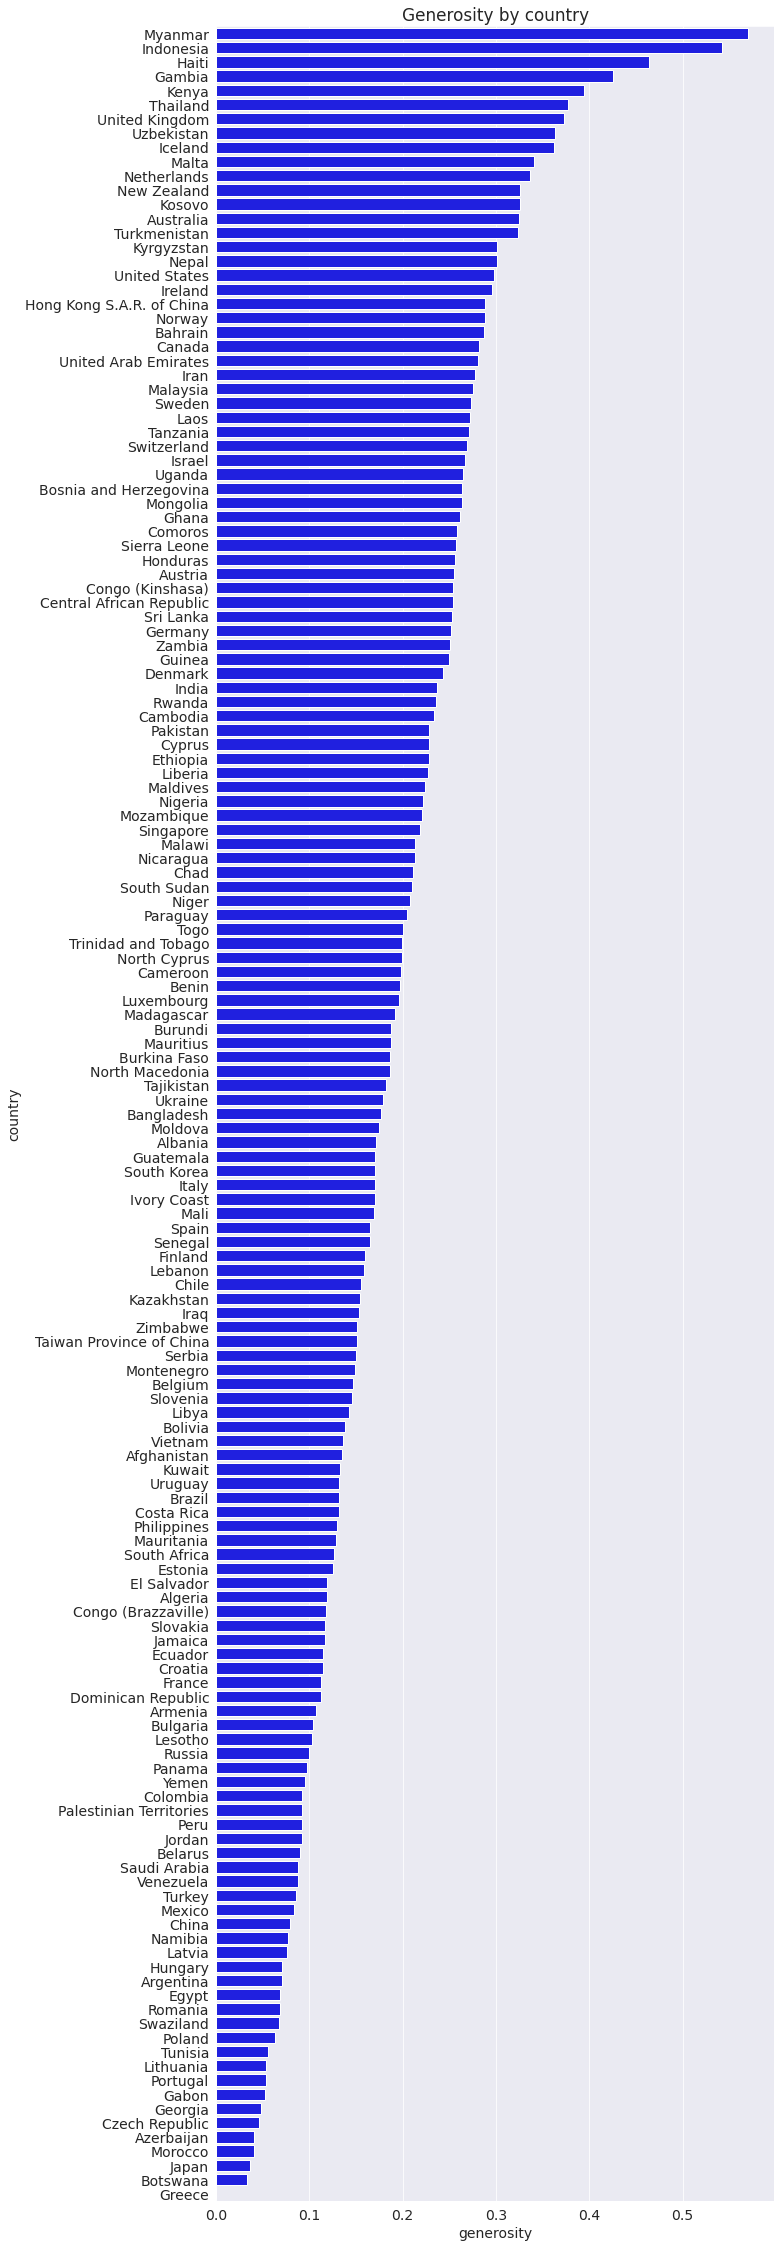

In [35]:
matplotlib.rcParams['figure.figsize'] = (10, 40)
matplotlib.rcParams['figure.facecolor'] = "#00000000"
custom_color = ["blue"]

sns.barplot(x= "generosity", y= "country", data= sorted_df, palette=custom_color);
plt.gca().set_title("Generosity by country")

From the above plot, we see that the top ten countries are Myanmar, Indonesia, Haiti, Gambia, Kenya, Thailand, UK, Uzbekistan, Iceland, Malta. 

#### Q5: Which country has the most healthy people?

To answer this question, we will also be sorting our data frame but this time using the healthy life expectancy score in descending order.

In [36]:
df.sort_values(by="healthy_life_expectancy", ascending=False)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
30,Singapore,Southeast Asia,6.3771,1.519580,1.395457,1.137814,0.635317,0.218771,0.533162
77,Hong Kong S.A.R. of China,East Asia,5.5104,1.376746,1.243584,1.136631,0.459357,0.288281,0.332485
61,Japan,East Asia,5.8708,1.266724,1.332339,1.072881,0.495466,0.035712,0.181440
27,Spain,Western Europe,6.4009,1.230535,1.421099,1.051343,0.425984,0.165305,0.109580
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
22,France,Western Europe,6.6638,1.268129,1.458839,1.029714,0.514051,0.112608,0.227303
44,Cyprus,Western Europe,6.1590,1.212799,1.149171,1.026125,0.459386,0.227932,0.051207
75,North Cyprus,Western Europe,5.5355,1.212799,1.183089,1.026125,0.477886,0.199160,0.199803
11,Australia,North America and ANZ,7.2228,1.310396,1.477146,1.022608,0.621877,0.324974,0.335996
60,South Korea,East Asia,5.8724,1.245301,1.133561,1.022543,0.259356,0.170304,0.094596


From the above sorted data frame, we can see that Singapore has the highest healthy life expectancy score. We can then infer from this that Singapore has the most healthy people in the world in the year 2020.

Let us save and upload our work to Jovian before continuing.

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hopeikuesan/zerotopandas-course-project-world-happiness" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/hopeikuesan/zerotopandas-course-project-world-happiness


'https://jovian.com/hopeikuesan/zerotopandas-course-project-world-happiness'

## Inferences and Conclusion

So far we have been able to find out the countries with the highest and least number of happy people, the top most countries with generous people, countries with the healthiest people and the countries of people with the most freedom to make life choices. 

We can conclude that countries in Western Europe are the happiest, countries in Sub-Saharan Africa and south Asia are the least happy, countries in Southeast Asia, Western Europe and Sub-Saharan Africa have the most generous people and countries in Asia and Western Europe have the healthiest people.

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hopeikuesan/zerotopandas-course-project-world-happiness" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/hopeikuesan/zerotopandas-course-project-world-happiness


'https://jovian.com/hopeikuesan/zerotopandas-course-project-world-happiness'

## References and Future Work

For future projects, we could analyze the happiness report in more recent years like 2023 and we can get other datasets to work on, on diverse topics on Kaggle.

For this project, we made use of external materials like Kaggle.com to get our dataset, ChatGPT for pointers and guidance in the right direction.


Link to chatGPT - https://chat.openai.com/


link to Kaggle - https://www.kaggle.com/

In [41]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>